<a href="https://colab.research.google.com/gist/shaimaa122/0781551818ceea2fb542710b7c3abb37/weekend_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Weekend Project
Group members:
- Shaima Alharbi
- Ghadi Khalid
- Ebtisam Alruhaili
- Aljowhara Alblaihed
---


## Data Source
The data used in this project is Titanic data. This data is from Kaggle and you can find the data description in this [**link**](https://www.kaggle.com/c/titanic/data).

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/intro_to_python/main/day_09/data/titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Explore Data 

In [3]:
titanic_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
titanic_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
290,291,1,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S


## Visualization Based on Gender


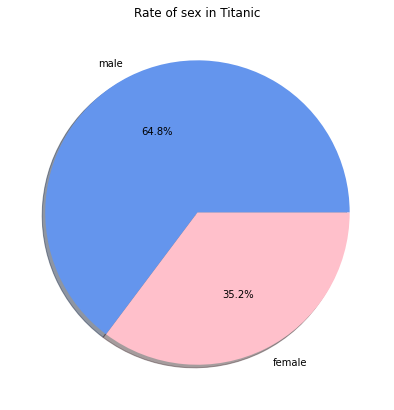

In [32]:
colors = ["cornflowerblue", "pink" ] #link of colors (https://www.webucator.com/blog/2015/03/python-color-constants-module/ )
Gender=titanic_df.Sex.value_counts()/titanic_df.shape[0]
plt.figure(figsize=[15, 7]);
plt.pie(Gender,labels=Gender.index,autopct='%1.1f%%',shadow=True,colors=colors);
plt.title('Rate of sex in Titanic');

We noticed that from all passengers in Titanic there are male more than female.

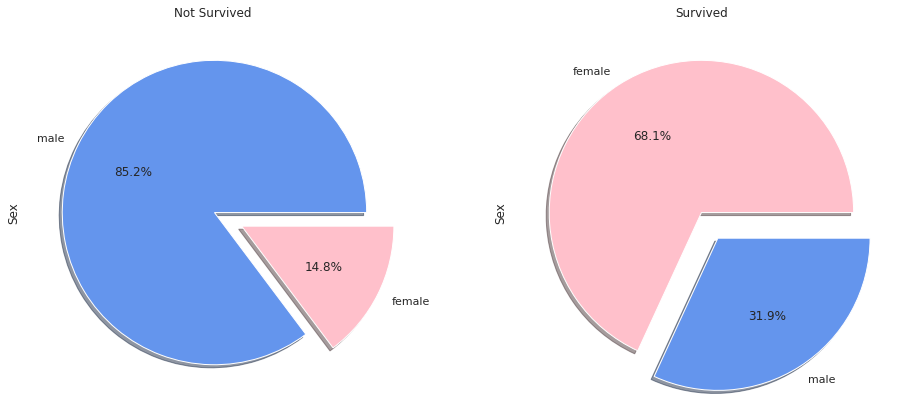

In [65]:
f,ax=plt.subplots(1,2,figsize=(16,7))
titanic_df['Sex'][titanic_df['Survived']==0].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True,colors=colors)
titanic_df['Sex'][titanic_df['Survived']==1].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True,colors=[ "pink","cornflowerblue"] )
ax[0].set_title('Not Survived ')
ax[1].set_title('Survived')
plt.show()

Here is the number of passengers survived or not by gender.

Text(0, 0.5, 'Average Age')

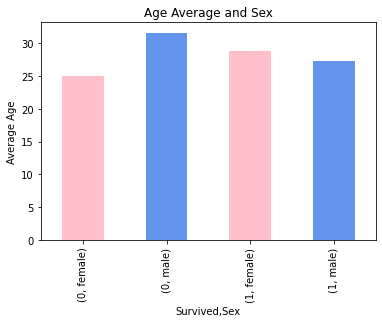

In [47]:
age_by_sex=titanic_df.groupby(['Survived','Sex']).Age.mean()
ax = age_by_sex.plot.bar(title='Age Average and Sex',color=[ "pink","cornflowerblue"])
ax.set_ylabel('Average Age')

Represent the average age for number of passengers based on Survived or not and gender.

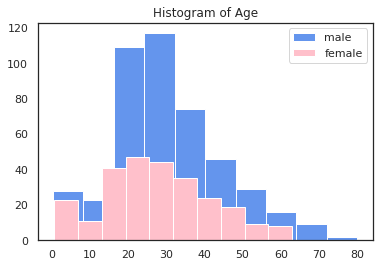

In [107]:
plt.hist(titanic_df.Age[titanic_df.Sex=="male"], bins = 10,color="cornflowerblue",label="male")
plt.hist(titanic_df.Age[titanic_df.Sex=="female"], bins = 10,color="pink",label="female")
plt.title("Histogram of Age")
plt.legend()
plt.show()

Represent the distribution of Age based on gender. 

## Visualization based on Fare

Text(0, 0.5, 'Fare Sum')

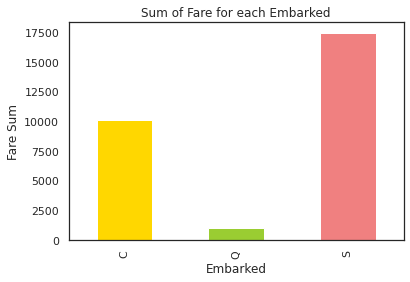

In [76]:
fare_by_embarked=titanic_df.groupby(['Embarked']).Fare.sum()
ax = fare_by_embarked.plot.bar(title='Sum of Fare for each Embarked',color=['Gold' ,'YellowGreen','LightCoral'])
ax.set_ylabel('Fare Sum')

Represent the fare sum amount for each Embarked,where embarked is Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

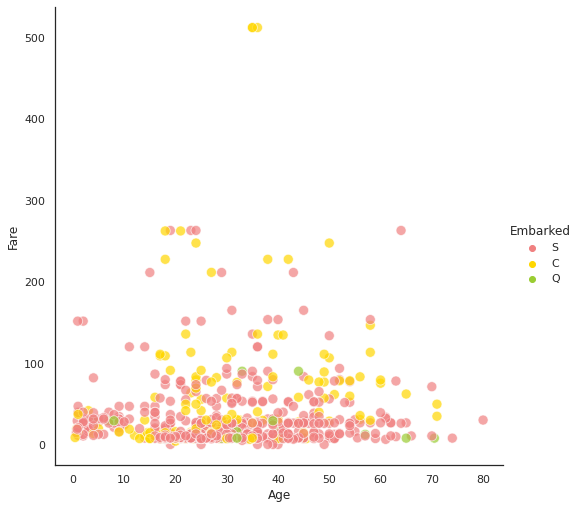

In [97]:
#(https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)
#How to increase the size of scatter points in matplotlib ?(https://moonbooks.org/Articles/How-to-increase-the-size-of-scatter-points-in-matplotlib-/)
sns.set_theme(style="white")
color2=['LightCoral' ,'Gold','YellowGreen']
sns.relplot(x="Age", y="Fare", hue="Embarked", 
            sizes=(50, 400), alpha=0.7, palette=color2,s=100,
            height=7, data=titanic_df)

Represent the distribution of fare amount by age for each Embarked.

## Visualization based on Pclass

Text(0, 0.5, 'Passengers')

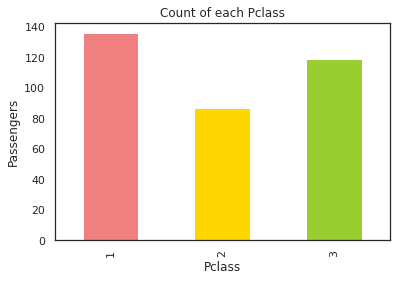

In [111]:
pclass_sum=titanic_df.groupby(['Pclass']).Survived.sum()
ax = pclass_sum.plot.bar(title='Count of each Pclass',color=['LightCoral' ,'Gold','YellowGreen'])
ax.set_ylabel('Passengers')

Represent the number of passengers based on Pclass,where Pclass  is Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd.

## Conclusion
- In this data, the number of Male passengers was more than Female passengers. 
The percentage is 64.8% male and 35.2% female.
But the percentage for who survived was 31.9% male and 68.1% female.
the percentage for who did not survive was 85.2% male and 14.8% female.

- We found age average for male more than age average for female.
- A lot of passengers get in Titanic from port of embarkation was Southampton.
- Most of the passengers have a total amount of fares less than 100$ without been affected by their age.
- Ticket class 2nd has less passengers than 1st and 3rd.
